In [470]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import random

In [471]:
#Generate a dataset for testing k-means 
true_data, true_labels = make_blobs(n_samples=20, centers=3, random_state=42)
true_data = StandardScaler().fit_transform(true_data)

In [472]:
print(true_data)

[[-0.29013397  1.2402935 ]
 [-0.55103302  1.07187421]
 [-0.40305125  1.20549027]
 [-0.1422873   0.86593337]
 [ 1.05391662  0.14153321]
 [-1.37682406 -1.23529256]
 [-0.28887531  1.08659316]
 [ 1.29030458 -0.07697089]
 [ 1.179979    0.10117172]
 [ 1.16828821  0.03979822]
 [-1.05740324 -1.56402704]
 [ 1.5976922   0.04984646]
 [-0.94734419 -1.23917863]
 [-0.38127085  0.94230057]
 [-1.12484143 -1.31120068]
 [ 0.13561243  1.27457265]
 [-1.40806601 -1.3750321 ]
 [-0.92987151 -1.45140279]
 [ 1.30714282 -0.13292083]
 [ 1.16806628  0.36661818]]


In [473]:
print(true_data.shape)

(20, 2)


In [474]:
print(true_labels)

[0 0 0 0 1 2 0 1 1 1 2 1 2 0 2 0 2 2 1 1]


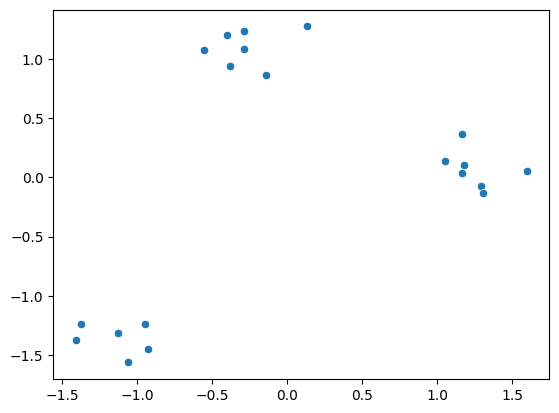

In [475]:
#Visualize the data
sns.scatterplot(x=[data[0] for data in true_data], y=[data[1] for data in true_data])
plt.show()

## K-Means algorithm

In [476]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)

In [477]:
class kmeans:

    def __init__(self, no_of_clusters, max_iters):
        self.no_of_clusters = no_of_clusters
        self.max_iters = max_iters

        self.clusters = [[] for i in range(self.no_of_clusters)]
        self.centroids = []

    #Find the centroid closest to a data point    
    def find_nearest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    #Add a data point to the nearest centroid
    def assign_to_nearest_centroid(self, centroids):
        clusters = [[] for i in range(self.no_of_clusters)]
        for idx, sample in enumerate(self.x):
            nearest_centroid = self.find_nearest_centroid(sample, centroids)
            clusters[nearest_centroid].append(idx)
        return clusters

    #Update the value of the centroids (mean of coordinates of points in each cluster)
    def update_centroids(self, clusters):
        centroids = np.zeros((self.no_of_clusters, self.no_of_features))
        for cluster_index, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.x[cluster], axis=0)
            centroids[cluster_index] = cluster_mean
        return centroids

    #Check if the new centroid coordiates are the same as the previous coordinates
    def check_for_convergence(self, current_centroids, centroids):
        distances = [euclidean_distance(current_centroids[i], centroids[i]) for i in range(self.no_of_clusters)]
        return sum(distances) == 0

    #Return the community structure
    def get_cluster_labels(self, clusters):
        labels = np.empty(self.no_of_samples)
        for cluster_index, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_index
        return labels


    def predict(self,x):
        self.x = x
        self.no_of_samples, self.no_of_features = x.shape
        
        #Initialize cluster centers randomly
        random_sample_indices = np.random.choice(self.no_of_samples, self.no_of_clusters, replace=False)
        self.centroids = [self.x[idx] for idx in random_sample_indices]

        #Modify cluster centers
        for i in range(self.max_iters):

            #assign points to clusters
            self.clusters = self.assign_to_nearest_centroid(self.centroids)

            #update centroid coordinatess
            current_centroids = self.centroids
            self.centroids = self.update_centroids(self.clusters)
            
            #check if the new and old centroid coordinates are the same
            if self.check_for_convergence(current_centroids, self.centroids):
                break


        #Finally, return the recovered community structure
        return self.get_cluster_labels(self.clusters)

In [478]:
#Test the kmeans class
##1. __init__()
kmeans_test = kmeans(3,500)
print(kmeans_test.clusters)
print(kmeans_test.centroids)

##2. predict()
kmeans_test.predict(true_data)
print(kmeans_test.centroids)
print(kmeans_test.clusters)

[[], [], []]
[]
[[-0.34277528  1.06874751]
 [ 1.11262527  0.22045609]
 [-1.14072507 -1.36268897]]
[[0, 1, 2, 3, 6, 13], [4, 7, 8, 9, 11, 15, 18, 19], [5, 10, 12, 14, 16, 17]]


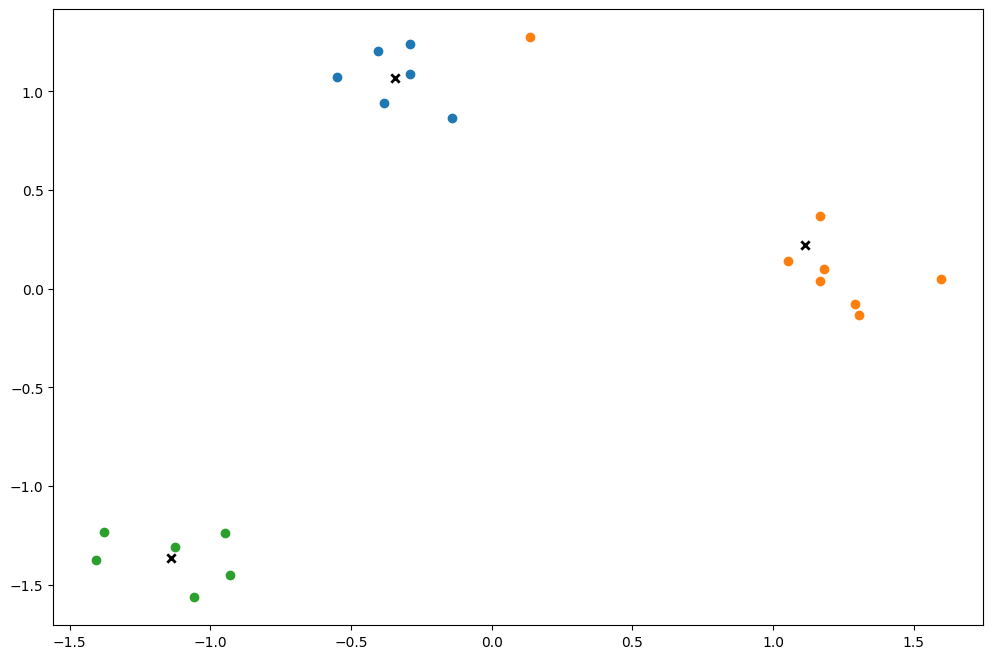

In [479]:
#Visualize the results
#Function credits - https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
fig, ax = plt.subplots(figsize=(12, 8))
for i, index in enumerate(kmeans_test.clusters):
    point = kmeans_test.x[index].T
    ax.scatter(*point)

for point in kmeans_test.centroids:
        ax.scatter(*point, marker="x", color='black', linewidth=2)

plt.show()